#  TODO Plotly Scatter plots and bubble charts with Dimensions data

* https://plotly.com/python/bubble-charts/
* https://plotly.com/python/line-and-scatter/

In [ ]:
import os
import sys
import time
import json
import pandas as pd
from pandas import json_normalize
from tqdm.notebook import tqdm as progress
import plotly.express as px
from plotly.offline import plot
if not 'google.colab' in sys.modules:
  # make js dependecies local / needed by html exports 
  from plotly.offline import init_notebook_mode
  init_notebook_mode(connected=True)
#
import dimcli
from dimcli.shortcuts import *
#
dimcli.login()
dsl = dimcli.Dsl()

DimCli v0.5.4 - Succesfully connected to <https://app.dimensions.ai> (method: dsl.ini file)


### Testing out plotly_express with DSL data

In [ ]:
res = dslquery("""search publications for "malaria" where research_org_country_names="Italy" and year < 2010 return publications[basics] limit 500""")

Returned Publications: 500 (total = 3331)


In [ ]:
df = res.as_dataframe()
df = df.fillna("undefined")

In [ ]:
df.head(5)

,author_affiliations,id,issue,journal.id,journal.title,pages,title,type,volume,year
0,"[[{'first_name': 'Francesco', 'last_name': 'Se...",pub.1032403232,2,jour.1295566,Fragmenta entomologica,213-372,LE ZANZARE ITALIANE: GENERALITÀ E IDENTIFICAZI...,article,41,2009
1,"[[{'first_name': 'Barbara C.', 'last_name': 'B...",pub.1004146769,undefined,undefined,undefined,261-285,Determining the Activity of Mucosal Adjuvants,chapter,626,2009
2,"[[{'first_name': 'David W.', 'last_name': 'Rog...",pub.1052568629,12,jour.1032549,PLoS Biology,e1000272,Transglutaminase-Mediated Semen Coagulation Co...,article,7,2009
3,"[[{'first_name': 'Devendra', 'last_name': 'Ban...",pub.1007487910,12,jour.1037553,PLoS ONE,e8245,IgG Autoantibody to Brain Beta Tubulin III Ass...,article,4,2009
4,"[[{'first_name': 'Paolo', 'last_name': 'Coghi'...",pub.1026635135,12,jour.1036021,ChemMedChem,1957-1957,Cover Picture: Interaction of Artemisinins wit...,article,4,2009


### scatter matrix is prob better when you have numeric values or not too many categorical ones

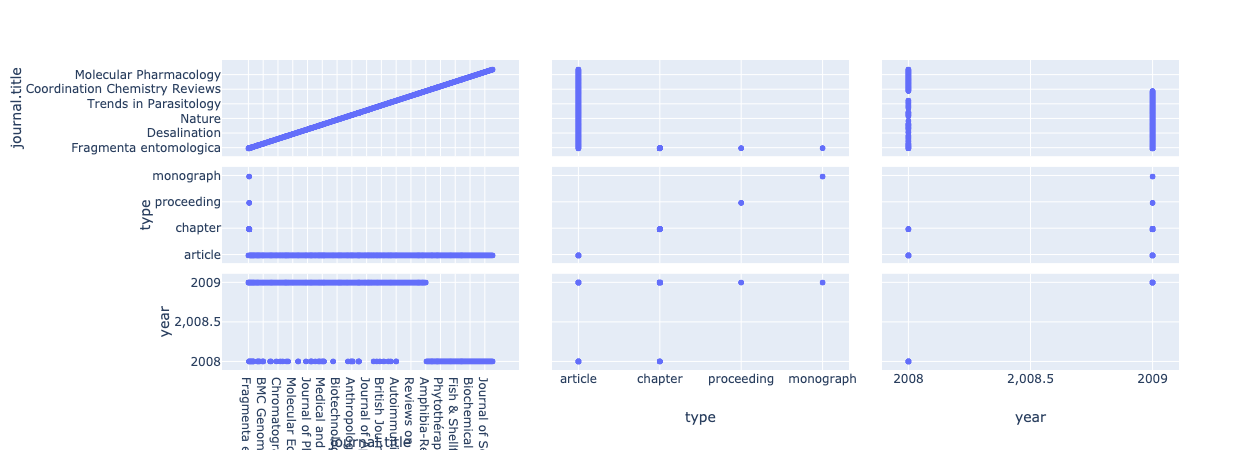

In [ ]:
px.scatter_matrix(df, dimensions=["journal.title",  "type", "year"])

### Testing out plotly_express default examples

In [ ]:
import plotly_express as px

In [ ]:
print(px.data.iris.__doc__)
iris = px.data.iris()


    Each row represents a flower.

    https://en.wikipedia.org/wiki/Iris_flower_data_set

    Returns:
        A `pandas.DataFrame` with 150 rows and the following columns: `['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species',
       'species_id']`.
    


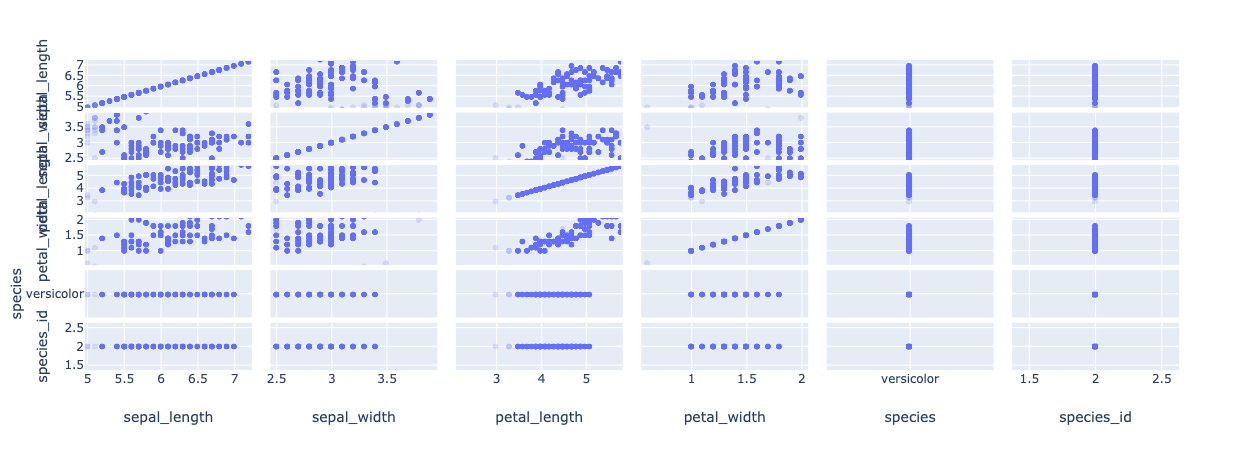

In [ ]:
px.scatter_matrix(iris)